<a href="https://colab.research.google.com/github/priyanshgupta1998/Opencv_practice/blob/master/prac0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCV, a popular Computer Vision package

Python's OpenCV is actually a wrapper on top of the C/C++ implementation of the library, which makes it really fast. 

Numpy library actually get converted and executed into C, which makes it really fast as well.

In [2]:
import numpy as np
import cv2
print(cv2.__version__)

3.4.3


In [4]:
img = cv2.imread('/home/download.jpg') # take the image as itas (coloired)
print(len(img))
print(img.shape)

183
(183, 276, 3)


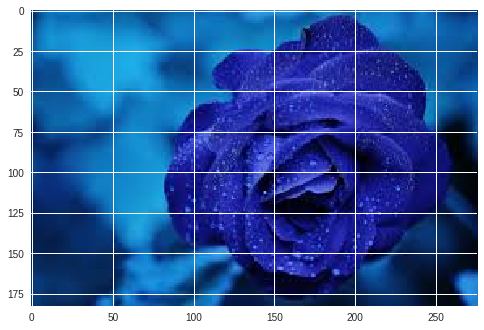

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/home/download.jpg') 
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # convert from BGR 2 RGB  order by using the opencv
plt.imshow(img_cvt)

In [9]:
ones = np.ones(3)
ones

array([1., 1., 1.])

In [13]:
zero = np.zeros(3)
zero

array([0., 0., 0.])

In [14]:
ones + zero

array([1., 1., 1.])

In [15]:
ones = np.ones((2, 2)) # (2, 2) describes the shape that I want
ones

array([[1., 1.],
       [1., 1.]])

In [16]:
identity = np.eye(2) # an Identity matrix
identity

array([[1., 0.],
       [0., 1.]])

In [17]:
# A lot of functions built in
print(np.linalg.norm(ones))    # it takes the square  root of sum of all the digits(squared)


2.0


In [19]:
# A lot of functions built in
print(np.linalg.norm(identity))  # it takes the square  root of sum of all the digits(squared)


1.4142135623730951


In [28]:
d2 = np.array([[2,3],
              [4,7]])
print(np.linalg.norm(d2))  # it takes the square  root of sum of all the digits(squared)
print(np.linalg.norm(d2, axis=0))   # sqrt(4+20)  , sqrt(9+49)
print(np.linalg.norm(d2, axis=1))    # sqrt(4+9)  , sqrt(16+49)


8.831760866327848
[4.47213595 7.61577311]
[3.60555128 8.06225775]


In [32]:
mtx1 = np.random.random((8, 1, 7, 1))  # 4d 
print(len(mtx1))
print(mtx1.shape)
print(mtx1[:2])

8
(8, 1, 7, 1)
[[[[0.44965875]
   [0.41159481]
   [0.23158885]
   [0.74734626]
   [0.46770361]
   [0.0213062 ]
   [0.69850318]]]


 [[[0.40420409]
   [0.60136884]
   [0.83444766]
   [0.09023966]
   [0.01145851]
   [0.93881781]
   [0.92494995]]]]


In [0]:
%matplotlib inline          # it is used to display the result in the same window just below
from matplotlib import pyplot as plt
import cv2

<class 'numpy.ndarray'>


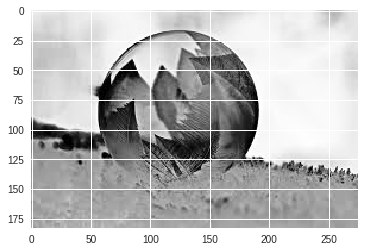

In [37]:
# Load in Grayscale
img = cv2.imread('/home/download (1).jpg', 0)
print(type(img))
plt.imshow(img)

<class 'numpy.ndarray'>


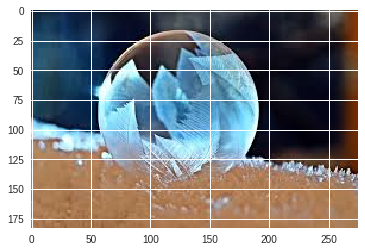

In [38]:
img = cv2.imread('/home/download (1).jpg')
print(type(img))
plt.imshow(img)

<class 'numpy.ndarray'>


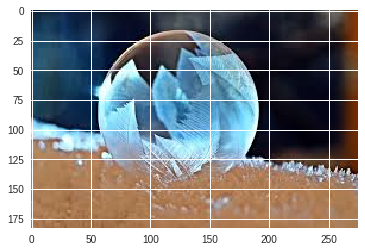

In [46]:
img = cv2.imread('/home/download (1).jpg',1)
print(type(img))
plt.imshow(img)

We can see that in the above image  the colors are off - this is because **OpenCV uses a BGR** ordering of their image channels.

that's why we get image in different colour.

In Colab, you cannot use the standard OpenCV 'imshow' function, so we use matplotlib.


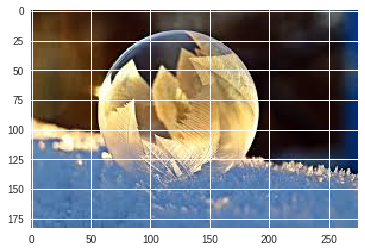

In [47]:
img_in_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    # we are converting the colour order BGR to RGB (original manner) by using opencv

plt.imshow(img_in_rgb)  # we get original coloued image

In [51]:
l = [1,2,3,4,5]
l[::-1]   # reverse the list 

[5, 4, 3, 2, 1]

**2nd method of converting the BGR 2 RGB**

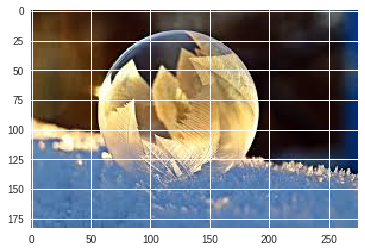

In [50]:
# Or, use fun numpy functions / indexing!
imgrgb = img[:,:,::-1]    # reverse the order of a image color by using numpy funtions
plt.imshow(imgrgb)

#Image Resizing

OpenCV is super useful TOOL for doing lots of image transformations

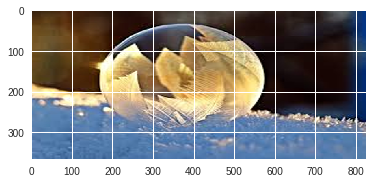

In [55]:
# Expanding   
res = cv2.resize(imgrgb, None,fx=3, fy=2, interpolation = cv2.INTER_CUBIC)
plt.imshow(res)

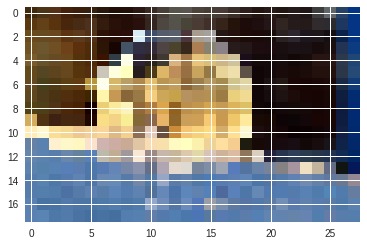

In [53]:
# Shrinking   AND make blurred image
res = cv2.resize(imgrgb, None,fx=.1, fy=.1, interpolation = cv2.INTER_CUBIC)
plt.imshow(res)

#Some Automation Technique 

don't know about it but just copied it from some where

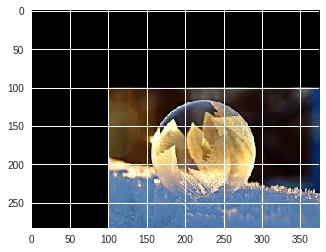

In [64]:
#@title Transformation Parameters { run: "auto" }

theta_degrees = 360 #@param {type:"slider", min:0, max:360, step:10}
shift_x = 100 #@param {type:"slider", min:-100, max:100, step:2}
shift_y = 100 #@param {type:"slider", min:-100, max:100, step:2}

# We can also play around with rotations by defining our M matrix, 
# which has the form:
"""
| cos(theta) -sin(theta) tx | 
| sin(theta)  cos(theta) ty |
"""

rows, cols, _ = imgrgb.shape

radians = theta_degrees * np.pi / 180
M = [
        [np.cos(radians), -np.sin(radians), shift_x], 
        [np.sin(radians),  np.cos(radians), shift_y]
    ]

M = np.array(M)
rows += int(shift_x)
cols += int(shift_y)

res = cv2.warpAffine(imgrgb, M, (cols,rows))

plt.imshow(res)
plt.show()

#(Slightly) Advanced Image Manipulation Techniques

In [0]:
# make things easier!
img = imgrgb

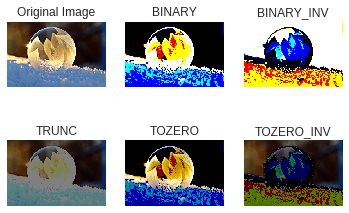

In [66]:
# Thresholding is cool
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

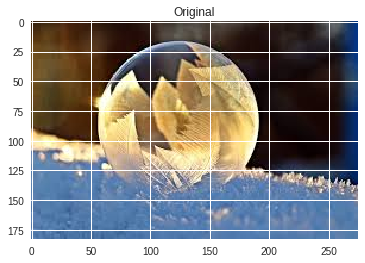

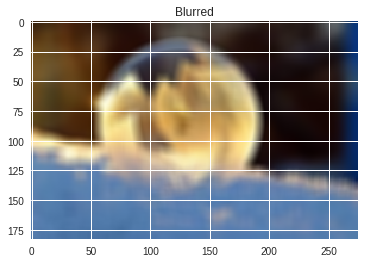

(<matplotlib.image.AxesImage at 0x7fcfe14969e8>,
 Text(0.5, 1.0, 'Gaussian Blur'))

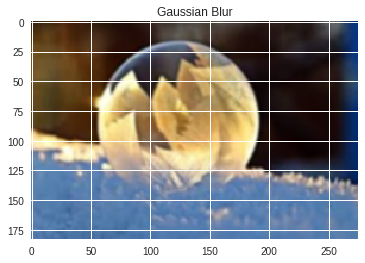

In [67]:
# Blurring - smoothes the image out
blur = cv2.blur(img,(10, 10))
gblur = cv2.GaussianBlur(imgrgb,(5,5),0)

plt.imshow(img), plt.title('Original')
plt.show()
plt.imshow(blur), plt.title('Blurred')
plt.show()
plt.imshow(gblur),plt.title('Gaussian Blur')
plt.show()

#Pracitce

**Thresholding **

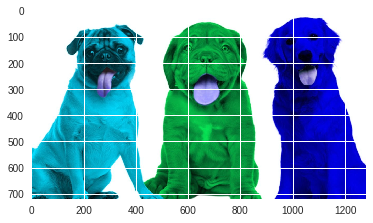

In [71]:
img_ = cv2.imread('/home/dog_combo.jpg')
plt.imshow(img_)    # IN   BGR  oreder 

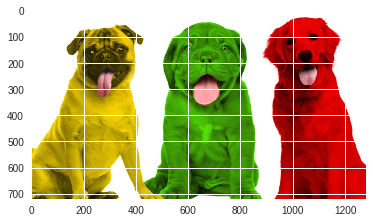

In [78]:
imgr = img_[:,:,::-1]    # reverse the order of a image color by using numpy funtions
plt.imshow(imgr)   # we get the acatual image (original_view)

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

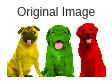

In [81]:
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
plt.subplot(2,3,1)   # 2 row and 3 columns and at No./Position 1
plt.imshow(imgr,'gray')  
plt.title(titles[0])
plt.xticks([]),plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

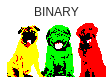

In [86]:
ret_,thresh_img1 = cv2.threshold(imgr,127,255,cv2.THRESH_BINARY)
plt.subplot(2,3,1),plt.imshow(thresh_img1,'gray')   # 2 rows and 3 columns and at No./Position 1
plt.title(titles[1])
plt.xticks([]),plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

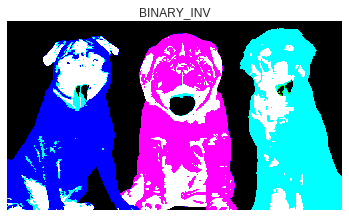

In [88]:
ret_,thresh_img2 =cv2.threshold(imgr,127,255,cv2.THRESH_BINARY_INV)
plt.subplot(1,1,1)    # 1 row and 1 columns and at No./Position 1
plt.imshow(thresh_img2,'gray')  
plt.title(titles[2])
plt.xticks([]),plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

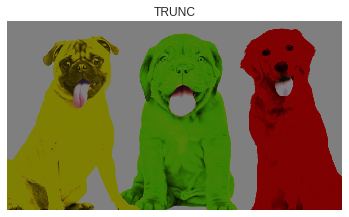

In [89]:
ret_,thresh_img3 =  cv2.threshold(imgr,127,255,cv2.THRESH_TRUNC)
plt.subplot(1,1,1)    # 1 row and 1 columns and at No./Position 1
plt.imshow(thresh_img3,'gray')  
plt.title(titles[3])
plt.xticks([]),plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

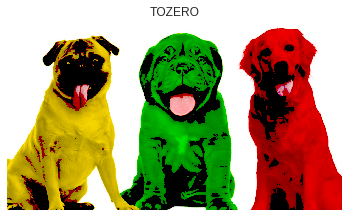

In [93]:
ret_,thresh_img4 =  cv2.threshold(imgr,127,255,cv2.THRESH_TOZERO)
plt.subplot(1,1,1)    # 1 row and 1 columns and at No./Position 1
plt.imshow(thresh_img4,'gray')  
plt.title(titles[4])
plt.xticks([]),plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

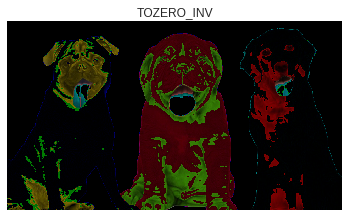

In [95]:
ret_,thresh_img5 = cv2.threshold(imgr,127,255,cv2.THRESH_TOZERO_INV)
plt.subplot(1,1,1)    # 1 row and 1 columns and at No./Position 1
plt.imshow(thresh_img5,'gray')  
plt.title(titles[5])
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

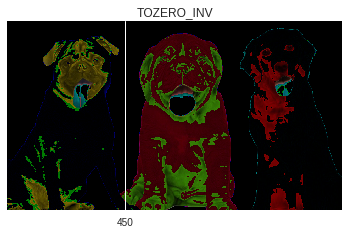

In [99]:
ret_,thresh_img5 = cv2.threshold(imgr,127,255,cv2.THRESH_TOZERO_INV)
plt.subplot(1,1,1)    # 1 row and 1 columns and at No./Position 1
plt.imshow(thresh_img5,'gray')  
plt.title(titles[5])
plt.xticks([450])   # Devide the image bY Draw one vertical line from left to right
plt.yticks([])

([<matplotlib.axis.YTick at 0x7fcfe15e5390>],
 <a list of 1 Text yticklabel objects>)

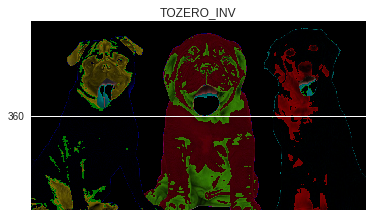

In [103]:
ret_,thresh_img5 = cv2.threshold(imgr,127,255,cv2.THRESH_TOZERO_INV)
plt.subplot(1,1,1)    # 1 row and 1 columns and at No./Position 1
plt.imshow(thresh_img5,'gray')  
plt.title(titles[5])
plt.xticks([])
plt.yticks([360]) #  Draw one Horizontal line from top to down 

#Practice 2

([], <a list of 0 Text xticklabel objects>)

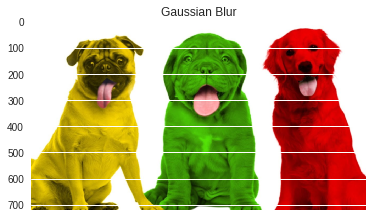

In [115]:
gblur_ = cv2.GaussianBlur(imgr,(5,5),0)  # taking original image of DOG_COMBO
plt.subplot(1,1,1)
plt.imshow(gblur_ , 'gray')
plt.title('Gaussian Blur')
plt.xticks([])  # Remove all vertical lines 

([], <a list of 0 Text yticklabel objects>)

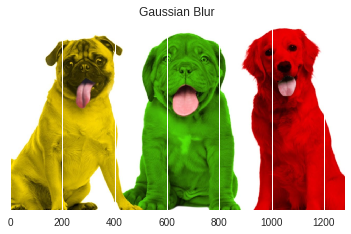

In [118]:
gblur_ = cv2.GaussianBlur(imgr,(5,5),0)  # taking original image of DOG_COMBO
plt.subplot(1,1,1)
plt.imshow(gblur_ , 'gray')
plt.title('Gaussian Blur')
plt.yticks([])  # Remove all Horizontal lines 

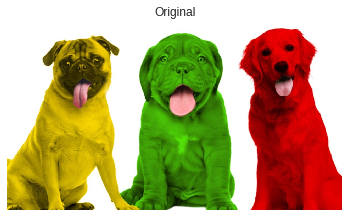

([], <a list of 0 Text xticklabel objects>)

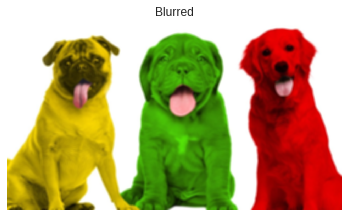

In [123]:
# Blurring - smoothes the image out
blur_ = cv2.blur(imgr,(10, 10))  
plt.imshow(imgr), plt.title('Original')
plt.yticks([])  # Remove all Horizontal lines 
plt.xticks([])  # Remove all vertical lines 

plt.show()   # after this command we can print another image at a time


plt.imshow(blur_), plt.title('Blurred')
plt.yticks([])  # Remove all Horizontal lines 
plt.xticks([])  # Remove all vertical lines 